# Code to produce figure 2

__Zoïs Moitier (2021)__
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))
import src.helmholtz as hel

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse, Rectangle

%matplotlib inline

## Internal plotting functions

In [3]:
def grid_2d(H, N):
    h = np.linspace(-H, H, num=N)
    x, y = np.meshgrid(h, h)
    return (x, y)

In [4]:
def one_plot(fig, ax, x, y, u, cmap, clim, artist, title):
    im = ax.pcolormesh(
        x, y, u, shading="gouraud", cmap=cmap, vmin=clim[0], vmax=clim[1]
    )

    ax.add_artist(artist())
    fig.colorbar(im, ax=ax)
    ax.set_aspect("equal", "box")
    ax.set_title(title, fontsize=15)

    return None


def plot_real(fig, ax, x, y, U, Uam, artist):
    V = np.real(U)
    one_plot(fig, ax, x, y, V, "RdBu_r", (-Uam, Uam), artist, "Real part")
    return None


def plot_imag(fig, ax, x, y, U, Uam, artist):
    V = np.imag(U)
    one_plot(fig, ax, x, y, V, "RdBu_r", (-Uam, Uam), artist, "Imaginary part")
    return None


def plot_abs(fig, ax, x, y, U, Uam, artist):
    V = np.abs(U)
    one_plot(fig, ax, x, y, V, "viridis", (0, Uam), artist, "Modulus")
    return None


def plot_arg(fig, ax, x, y, U, artist):
    V = np.angle(U)
    one_plot(
        fig, ax, x, y, V, "twilight_shifted_r", (-np.pi, np.pi), artist, "Argument"
    )
    return None

In [5]:
def four_plots(x, y, U, Uam, artist):
    fig_size = [1.5 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=fig_size, constrained_layout=True)

    plot_real(fig, ax[0, 0], x, y, U, Uam, artist)
    plot_imag(fig, ax[0, 1], x, y, U, Uam, artist)
    plot_abs(fig, ax[1, 0], x, y, U, Uam, artist)
    plot_arg(fig, ax[1, 1], x, y, U, artist)

    return None

In [6]:
def plot_field(ɛ, α, k, M, H, type_field, bdy_type):
    obs = hel.create_obstacle(ɛ=ɛ, bdy_type=bdy_type)
    in_field = hel.analytic.plane_wave_field(obs, α, k, M)

    x, y = grid_2d(H, 128)
    ξ, η = hel.to_elliptic(obs.c, x, y)

    if type_field.startswith("in"):
        U = hel.analytic.eval_incident_field(in_field, ξ, η)
        artist = lambda: Rectangle((-5, -5), 10, 10, fill=False, ec="k", lw=2)

    if type_field.startswith("sc"):
        sc_field = hel.analytic.get_scatter_field(obs, in_field)
        U = hel.analytic.eval_scatter_field(in_field, sc_field, ξ, η)
        artist = lambda: Ellipse((0, 0), 2 * ɛ, 2, fc=(0.75, 0.75, 0.75), ec="k", lw=2)

    if type_field.startswith("tt"):
        sc_field = hel.analytic.get_scatter_field(obs, in_field)
        U = hel.analytic.eval_total_field(in_field, sc_field, ξ, η)
        artist = lambda: Ellipse((0, 0), 2 * ɛ, 2, fc=(0.75, 0.75, 0.75), ec="k", lw=2)

    four_plots(x, y, U, np.abs(U).max(), artist)

    return None

## Parameters

In [7]:
## Ellipse parameter
ɛ = 1e-2

In [8]:
## Incident field parameters
α = 0  # (cos(α), sin(α)) direction of the plane wave
k = 2  # wavenumber direction of the plane wave
M = 15  # 2M+1 number of mode in the analytic sum

## Plot of the incident field

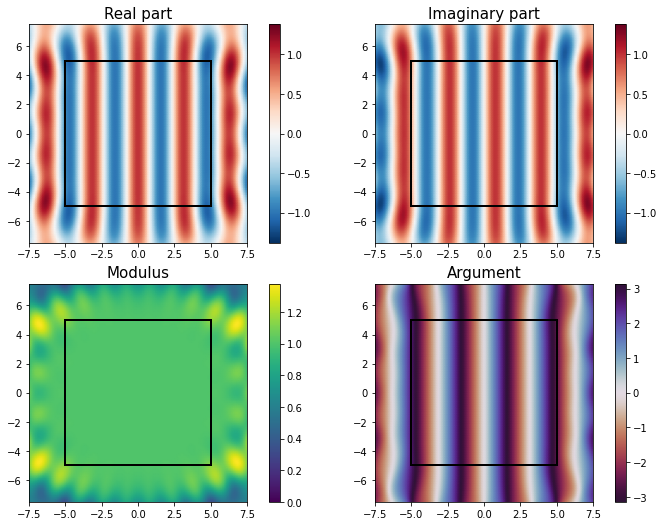

In [9]:
plot_field(ɛ, α, k, M, 7.5, "in", hel.BoundaryType.NEUMANN)

## Neuman boundary condition: Plot of the total field

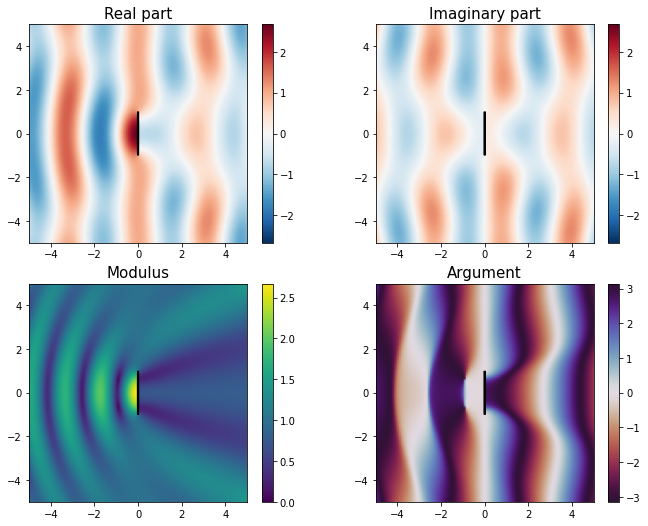

In [10]:
plot_field(ɛ, α, k, M, 5, "tt", hel.BoundaryType.NEUMANN)

## Neuman boundary condition: Plot of the scattered field

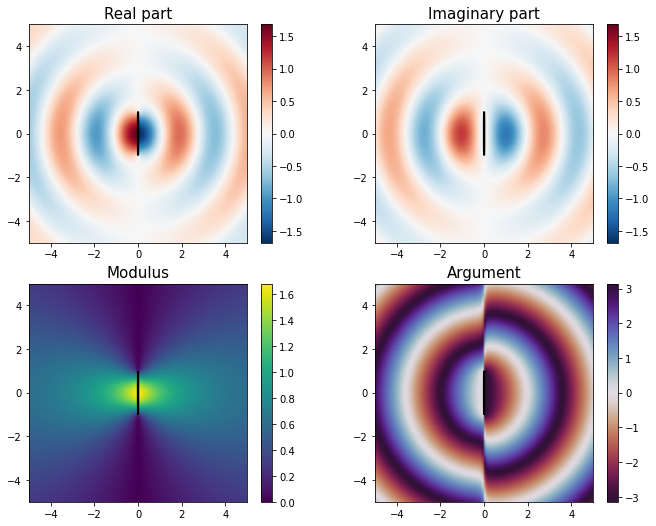

In [11]:
plot_field(ɛ, α, k, M, 5, "sc", hel.BoundaryType.NEUMANN)

## Dirichlet boundary condition: Plot of the total field

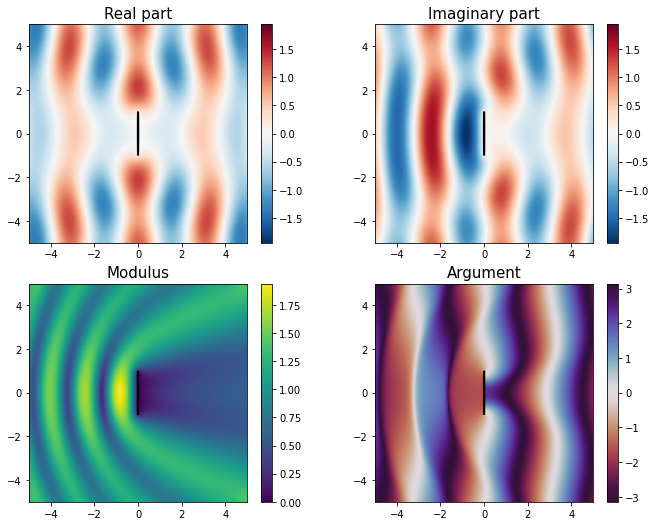

In [12]:
plot_field(ɛ, α, k, M, 5, "tt", hel.BoundaryType.DIRICHLET)

## Dirichlet boundary condition: Plot of the scattered field

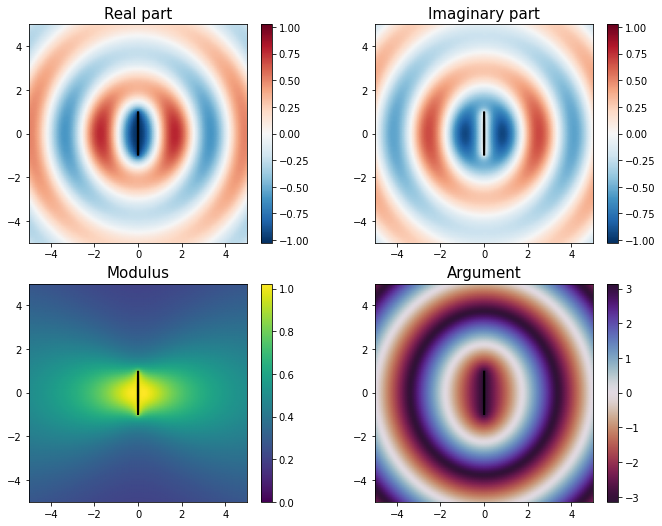

In [13]:
plot_field(ɛ, α, k, M, 5, "sc", hel.BoundaryType.DIRICHLET)